# MACHINE LEARNING WEEK2
## Python 3.5

### Importing Libraries

In [1]:
import pandas
import sklearn
import sklearn.cross_validation
import sklearn.linear_model
import matplotlib
import numpy
import math

%matplotlib inline 

### Reading data and splitting into training/test

In [2]:
csv = pandas.read_csv('housingsales.csv')
train, test = sklearn.cross_validation.train_test_split(csv, train_size = 0.8, random_state=0)

### Plotting all data

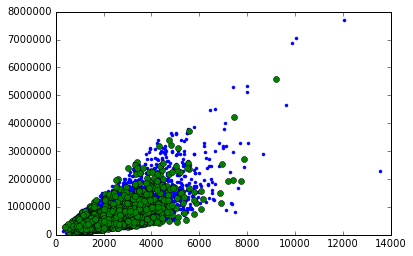

In [3]:
matplotlib.pyplot.plot(train['sqft_living'], train['price'],".", test['sqft_living'], test['price'], 'o')

### Creating SQFT Model

In [4]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(train['sqft_living'].reshape(-1,1), train['price'].reshape(-1,1))

print ("The coefficient is ", lr.coef_)
print ("Mean Square Error ", 
       numpy.mean((lr.predict(test['sqft_living'].reshape(-1,1)) - test['price'].reshape(-1,1))**2))
print ("RMSE ", 
       math.sqrt(numpy.mean((lr.predict(test['sqft_living'].reshape(-1,1)) - test['price'].reshape(-1,1))**2)))
print ("Variance score ", lr.score(test['sqft_living'].reshape(-1,1), test['price'].reshape(-1,1)))

The coefficient is  [[ 283.96855737]]
Mean Square Error  61940787221.5
RMSE  248879.06143647007
Variance score  0.479157707997


### Plot predicted SQFT model

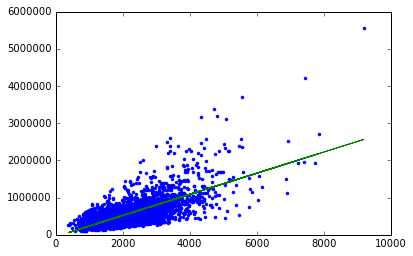

In [5]:
matplotlib.pyplot.plot(test['sqft_living'].reshape(-1,1), test['price'].reshape(-1,1),".",
                       test['sqft_living'].reshape(-1,1), lr.predict(test['sqft_living'].reshape(-1,1)), '-')

### Creating Model Based On Features

In [9]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

lrm = sklearn.linear_model.LinearRegression()
lrm.fit(train[features], train['price'])

print ("The coefficients are ", lrm.coef_)
print ("Mean Square Error ", numpy.mean((lrm.predict(test[features]) - test['price'])**2))
print ("RMSE ", math.sqrt(numpy.mean((lrm.predict(test[features]) - test['price'])**2)))
print ("Variance score ", lrm.score(test[features], test['price']))

The coefficients are  [ -5.66006330e+04   1.10870936e+04   3.20408369e+02  -2.89499140e-01
  -2.41800491e+03   6.17971071e+02]
Mean Square Error  59538329945.14344
RMSE  244004.7744310415
Variance score  0.499359281312


### Comparing House1

In [10]:
house1 = csv[csv.id == 5309101200]

print (house1)
print ("Features Model ", lrm.predict(house1[features]))
print ("Sqft Model ", lr.predict(house1['sqft_living'].reshape(-1,1)))

              id             date   price  bedrooms  bathrooms  sqft_living  \
1054  5309101200  20140605T000000  620000         4       2.25         2400   

      sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1054      5350     1.5           0     0     ...          7        1460   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
1054            940      1929             0    98117  47.6763 -122.37   

      sqft_living15  sqft_lot15  
1054           1250        4880  

[1 rows x 21 columns]
Features Model  [ 637556.26515923]
Sqft Model  [[ 633267.47422744]]


### Comparing House2

In [8]:
house2 = csv[csv.id == 1925069082]

print (house2)
print ("Features Model ", lrm.predict(house2[features]))
print ("Sqft Model ", lr.predict(house2['sqft_living'].reshape(-1,1)))

              id             date    price  bedrooms  bathrooms  sqft_living  \
1361  1925069082  20150511T000000  2200000         5       4.25         4640   

      sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1361     22703     2.0           1     4     ...          8        2860   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1361           1780      1952             0    98052  47.6393 -122.097   

      sqft_living15  sqft_lot15  
1361           3140       14200  

[1 rows x 21 columns]
Features Model  [ 1274443.76531348]
Sqft Model  [[ 1269357.04273158]]
